In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
#Check the datatypes of the columns
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [6]:
#Check count of missing values
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
# Check count of duplicate records
df.duplicated().sum()

0

In [8]:
# Check unique values in key columns
df.nunique()

Retailer               6
Retailer ID            4
Invoice Date         724
Region                 5
State                 50
City                  52
Product                6
Price per Unit       146
Units Sold           361
Total Sales         3512
Operating Profit    6510
Operating Margin     127
Sales Method           3
dtype: int64

In [9]:

df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [10]:
# Total sales Revenue
df['Total Sales'].sum()

899902125.0

In [11]:
#Average operating margin
df['Operating Margin'].mean()

0.42299129353233833

In [12]:
#Monthly sales trend (highest & Lowest Months)
monthly_sales = df.groupby(df['Invoice Date'].dt.month)['Total Sales'].sum()
monthly_sales.idxmax(), monthly_sales.max(), monthly_sales.idxmin(), monthly_sales.min()

(7, 95480694.0, 3, 56809109.0)

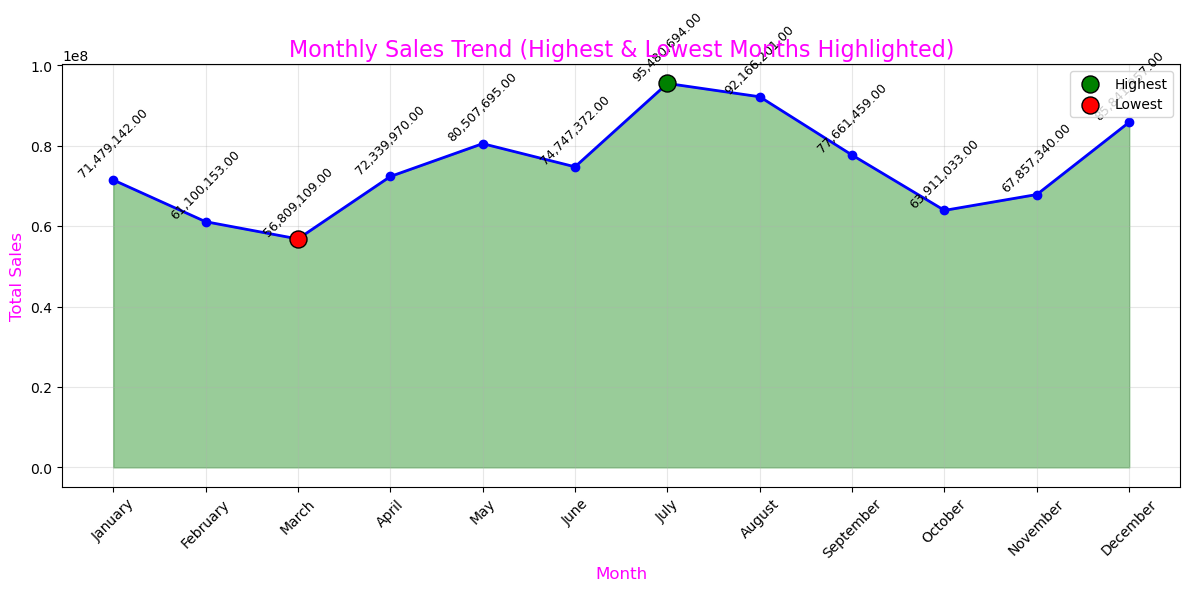

In [13]:
import matplotlib.pyplot as plt
import calendar

# --- 1. Aggregate total sales by month ---
monthly_sales = df.groupby(df['Invoice Date'].dt.month)['Total Sales'].sum()

# --- 2. Prepare month names ---
month_names = [calendar.month_name[m] for m in monthly_sales.index]

# --- 3. Create the Area chart with markers ---
plt.figure(figsize=(12, 6))
plt.fill_between(month_names, monthly_sales.values, alpha=0.4, color='green')       # area shading
plt.plot(month_names, monthly_sales.values, marker='o', linewidth=2, color='blue') # line with markers

# --- 4. Annotate each point with its sales value (2 decimals) ---
for x, y in zip(month_names, monthly_sales.values):
    plt.text(x, y, f"{y:,.2f}",   # <-- now rounded to 2 decimal places
             ha='center', va='bottom', fontsize=9, rotation=45)

# --- 5. Add titles & labels ---
plt.title('Monthly Sales Trend (Highest & Lowest Months Highlighted)', fontsize=16, color='magenta')
plt.xlabel('Month', fontsize=12, color='magenta')
plt.ylabel('Total Sales', fontsize=12, color='magenta')
plt.xticks(rotation=45)

# --- 6. Highlight highest & lowest months ---
highest_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()

plt.scatter(calendar.month_name[highest_month], monthly_sales.max(),
            color='green', s=150, edgecolor='black', zorder=5, label='Highest')
plt.scatter(calendar.month_name[lowest_month], monthly_sales.min(),
            color='red', s=150, edgecolor='black', zorder=5, label='Lowest')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
#Total operating profit by year
df.groupby(df['Invoice Date'].dt.year)['Operating Profit'].sum()

Invoice Date
2020    6.337566e+07
2021    2.687591e+08
Name: Operating Profit, dtype: float64

In [15]:
#Total operating profit by month
df.groupby(df['Invoice Date'].dt.month)['Operating Profit'].sum()

Invoice Date
1     25141934.51
2     21392736.70
3     20439788.00
4     27559237.31
5     29946255.33
6     26714715.92
7     34054898.59
8     34451440.30
9     31009586.73
10    25078444.60
11    24755521.43
12    31590202.03
Name: Operating Profit, dtype: float64

In [16]:
#Monthly operating profit trend (highest & Lowest Months)
monthly_profit = df.groupby(df['Invoice Date'].dt.month)['Operating Profit'].sum()
monthly_profit.idxmax(), monthly_profit.max(), monthly_profit.idxmin(), monthly_profit.min()

(8, 34451440.300000004, 3, 20439788.0)

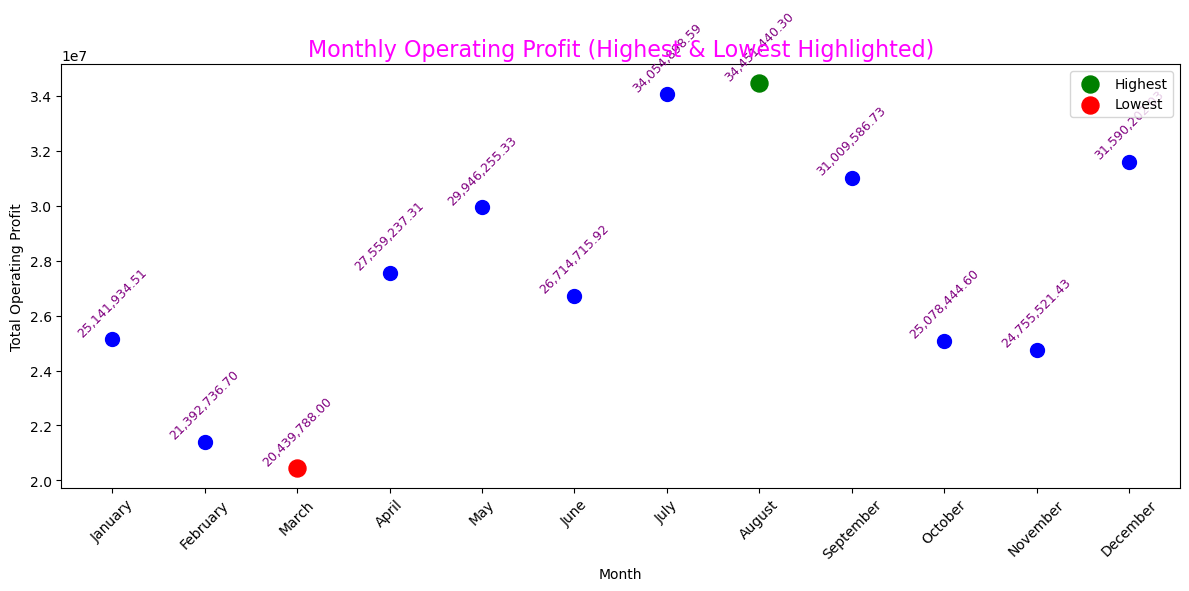

In [17]:
# Representing the months with highest and lowest operating profit using a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(month_names, monthly_profit.values, s=100, c='blue')

# Highlight highest & lowest
plt.scatter(calendar.month_name[monthly_profit.idxmax()], monthly_profit.max(), c='green', s=150, label='Highest')
plt.scatter(calendar.month_name[monthly_profit.idxmin()], monthly_profit.min(), c='red', s=150, label='Lowest')

# Annotate all points
for x, y in zip(month_names, monthly_profit.values):
    plt.text(x, y, f"{y:,.2f}", ha='center', va='bottom', fontsize=9, rotation=45, color='purple')

plt.title('Monthly Operating Profit (Highest & Lowest Highlighted)', fontsize=16, color='magenta')
plt.xlabel('Month')
plt.ylabel('Total Operating Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Compute correlation between all Total sales and operating profit
corr = df[['Total Sales', 'Operating Profit']].corr()
print(corr)

                  Total Sales  Operating Profit
Total Sales          1.000000          0.956307
Operating Profit     0.956307          1.000000


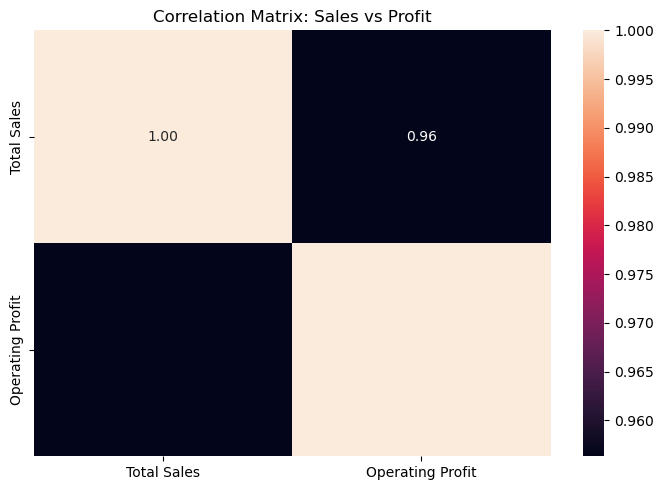

In [19]:
#Represent the corelation above using a heatmap
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df[['Total Sales', 'Operating Profit']].corr(),
            annot=True, fmt=".2f", cmap="rocket")
plt.title('Correlation Matrix: Sales vs Profit')
plt.tight_layout()
plt.show()

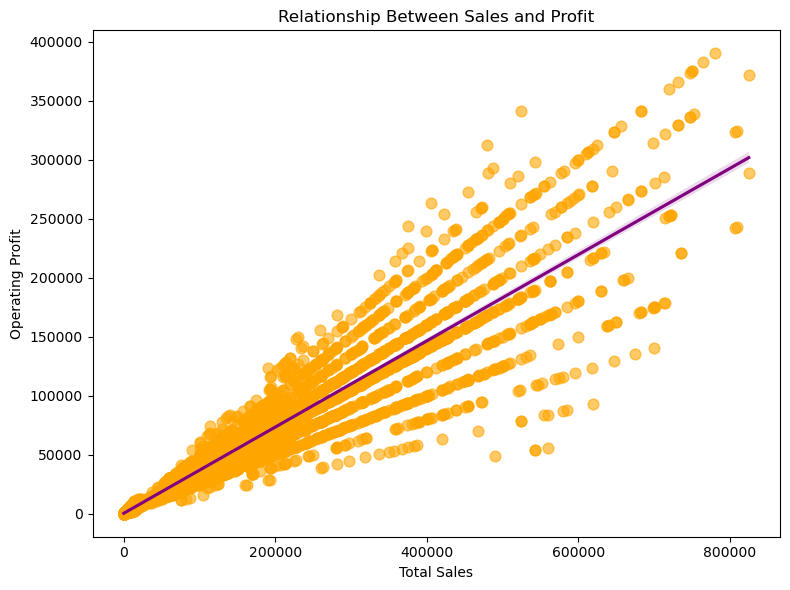

In [20]:
#Representing the corelation using a scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='Total Sales',
            y='Operating Profit',
            data=df,
            scatter_kws={'color': 'orange', 's': 60, 'alpha': 0.6},  # dot color
            line_kws={'color': 'purple'})                            # regression line color
plt.title('Relationship Between Sales and Profit')
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.tight_layout()
plt.show()

In [21]:
#Sales trend by month
df.set_index('Invoice Date').resample('M')['Total Sales'].sum()

Invoice Date
2020-01-31    16253746.0
2020-02-29    14997988.0
2020-03-31    17660577.0
2020-04-30    24607006.0
2020-05-31    16918014.0
2020-06-30     8829819.0
2020-07-31    17146013.0
2020-08-31    19877980.0
2020-09-30    18304436.0
2020-10-31    10836269.0
2020-11-30     8622300.0
2020-12-31     8026527.0
2021-01-31    55225396.0
2021-02-28    46102165.0
2021-03-31    39148532.0
2021-04-30    47732964.0
2021-05-31    63589681.0
2021-06-30    65917553.0
2021-07-31    78334681.0
2021-08-31    72288221.0
2021-09-30    59357023.0
2021-10-31    53074764.0
2021-11-30    59235040.0
2021-12-31    77815430.0
Freq: M, Name: Total Sales, dtype: float64

In [22]:
#Sales by day of the week
df['Invoice Date'].dt.day_name().value_counts()

Invoice Date
Tuesday      1490
Friday       1426
Saturday     1407
Sunday       1390
Wednesday    1346
Thursday     1343
Monday       1246
Name: count, dtype: int64

<Axes: xlabel='Invoice Date'>

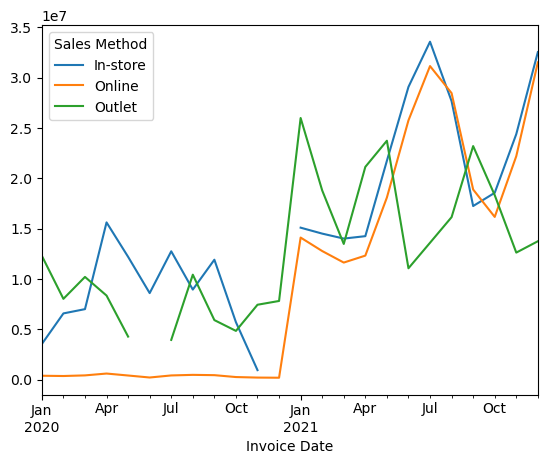

In [23]:
#instore vs online sales over time
df.groupby([df['Invoice Date'].dt.to_period('M'),'Sales Method'])['Total Sales'].sum().unstack().plot(kind='line')

In [24]:
df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [25]:
#Region with the highest total sales
df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64

In [26]:
# Top 5 states by sales
df.groupby('State')['Total Sales'].sum().nlargest(5)

State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Name: Total Sales, dtype: float64

In [27]:
# Region with highest average operating margin
df.groupby('Region')['Operating Margin'].mean()

Region
Midwest      0.435272
Northeast    0.410450
South        0.466898
Southeast    0.419167
West         0.396691
Name: Operating Margin, dtype: float64

In [31]:
# City with the highest units sold
df.groupby('City')['Units Sold'].sum().nlargest(1)

City
New York    111954
Name: Units Sold, dtype: int64

In [28]:
df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [33]:
#Retailer Perfomance 
#Retailer with most revenue
df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)

Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64

In [35]:
#Average operating profit per retailer
df.groupby('Retailer')['Operating Profit'].mean().sort_values(ascending=False)

Retailer
Walmart          41185.387556
Sports Direct    36581.178622
West Gear        36085.877498
Kohl's           35739.080175
Foot Locker      30611.348051
Amazon           30367.232150
Name: Operating Profit, dtype: float64

In [42]:
#Dominant retailer in each region
df.groupby(['Region', 'Retailer'])['Total Sales'].sum().sort_values(ascending=False).groupby(level=0).head(1)

Region     Retailer     
West       West Gear        137551280.0
Northeast  Foot Locker       65326474.0
South      Sports Direct     65258121.0
Southeast  Foot Locker       59669118.0
Midwest    Foot Locker       47987394.0
Name: Total Sales, dtype: float64

In [44]:
#Specialty vs mass-market retailers
specialty = ["Foot Locker","West Gear","Sports Direct"]
mass_market = ["Walmart","Amazon","Kohl's"]
sales_by_retailer = df.groupby("Retailer")["Total Sales"].sum()
sales_by_retailer.loc[specialty].sum(), sales_by_retailer.loc[mass_market].sum()

(645530050.0, 254372075.0)

<Axes: >

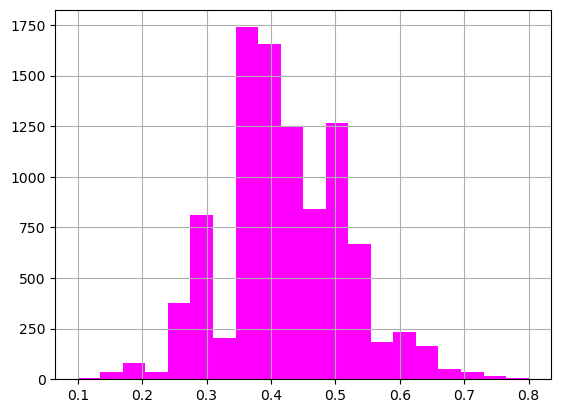

In [49]:
#Distribution of operating margins
df['Operating Margin'].hist(bins=20, color='magenta')

In [50]:
#Top 1% highest-value transactions
df[df['Total Sales'] > df['Total Sales'].quantile(0.99)]

#df["Total Sales"]
#This selects the column "Total Sales" from your DataFrame.
#It’s a pandas Series (basically, a single column of data).

#.quantile(0.99)
#This computes the 99th percentile (the value below which 99% of the data falls).
#In other words:

#99% of all transactions have "Total Sales" less than or equal to this number.

#The top 1% of transactions have "Total Sales" greater than this number.

#df["Total Sales"] > df["Total Sales"].quantile(0.99)
#This creates a boolean mask — a series of True/False values for each row.

#True for rows where "Total Sales" is greater than the 99th percentile.

#False otherwise.

#df[mask]
#Passing that boolean mask back into df filters the DataFrame.
#You get only the rows where the condition is True.

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.5,In-store
12,Foot Locker,1185732,2020-01-25,Northeast,New York,New York,Men's Street Footwear,50.0,1220,610000.0,305000.0,0.5,Outlet
18,Foot Locker,1185732,2020-01-31,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,Outlet
24,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.0,0.5,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,Sports Direct,1185732,2021-07-02,Southeast,North Carolina,Charlotte,Men's Street Footwear,65.0,1050,682500.0,273000.0,0.4,Online
2408,Sports Direct,1185732,2021-07-02,Southeast,North Carolina,Charlotte,Women's Apparel,70.0,875,612500.0,306250.0,0.5,Online
2409,Sports Direct,1185732,2021-08-03,Southeast,North Carolina,Charlotte,Men's Street Footwear,65.0,1025,666250.0,266500.0,0.4,Online
2433,Sports Direct,1185732,2021-12-02,Southeast,North Carolina,Charlotte,Men's Street Footwear,70.0,975,682500.0,273000.0,0.4,Online


In [51]:
#Correlation between sales,units, profits
df[['Units Sold','Total Sales','Operating Profit']].corr()

,Units Sold,Total Sales,Operating Profit
Units Sold,1.000000,0.913431,0.892379
Total Sales,0.913431,1.000000,0.956307
Operating Profit,0.892379,0.956307,1.000000


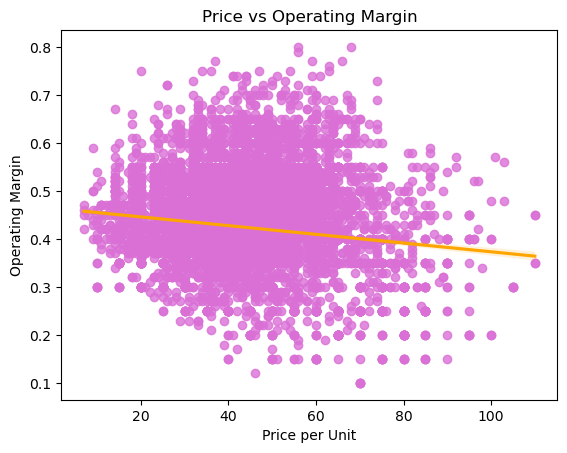

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=df,
    x="Price per Unit",
    y="Operating Margin",
    scatter_kws={'color': 'orchid'},
    line_kws={'color': 'orange'}
)
plt.title("Price vs Operating Margin")
plt.show()

In [67]:
# Do some retailers specialize in certain products?
df.groupby(["Retailer","Product"])["Total Sales"].sum().sort_values(ascending=False).groupby(level=0).head(2)

Retailer       Product              
Foot Locker    Men's Street Footwear    57481575.0
West Gear      Men's Street Footwear    53165419.0
               Women's Apparel          47287512.0
Foot Locker    Women's Apparel          43296114.0
Sports Direct  Men's Street Footwear    38672270.0
               Women's Apparel          37113257.0
Kohl's         Men's Street Footwear    22421073.0
Amazon         Men's Street Footwear    22161652.0
Kohl's         Women's Apparel          20315239.0
Amazon         Women's Apparel          15710639.0
Walmart        Women's Apparel          15316099.0
               Men's Street Footwear    14924255.0
Name: Total Sales, dtype: float64

In [70]:
# Sales efficiency = Total Sales per Unit
(df.groupby("Region")["Total Sales"].sum() / df.groupby("Region")["Units Sold"].sum()).sort_values(ascending=False)

Region
Southeast    400.912128
West         392.938975
Northeast    371.697332
Midwest      347.016661
South        293.875556
dtype: float64

In [72]:
# Profit per unit (new feature)
df["Profit per Unit"] = df["Operating Profit"] / df["Units Sold"]
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Profit per unit,Profit per Unit
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,250.0,250.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,150.0,150.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,140.0,140.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,157.5,157.5
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,180.0,180.0


In [75]:
#sales efficiency = Total sales per unit 
(df.groupby('Region')['Total Sales'].sum() / df.groupby('Region')['Units Sold'].sum()).sort_values(ascending=False)

Region
Southeast    400.912128
West         392.938975
Northeast    371.697332
Midwest      347.016661
South        293.875556
dtype: float64

In [76]:
# Products, price per unit and units sold
avg_price = df["Price per Unit"].mean()
df.groupby("Product")[["Price per Unit","Units Sold"]].mean().query("`Price per Unit` > @avg_price").sort_values("Units Sold", ascending=False)

,Price per Unit,Units Sold
Product,,
Women's Apparel,51.600746,269.792910
Men's Apparel,50.321918,190.960772


In [78]:
# Which retailers are most consistent (lowest monthly sales variance)?
df.groupby(["Retailer", df["Invoice Date"].dt.to_period("M")])["Total Sales"].sum().groupby("Retailer").std().sort_values()

Retailer
Amazon           2.046235e+06
Walmart          2.665515e+06
Kohl's           4.185273e+06
West Gear        5.094526e+06
Sports Direct    7.344599e+06
Foot Locker      7.655212e+06
Name: Total Sales, dtype: float64